经典网络之VGG

# 1.网络结构-VGG16

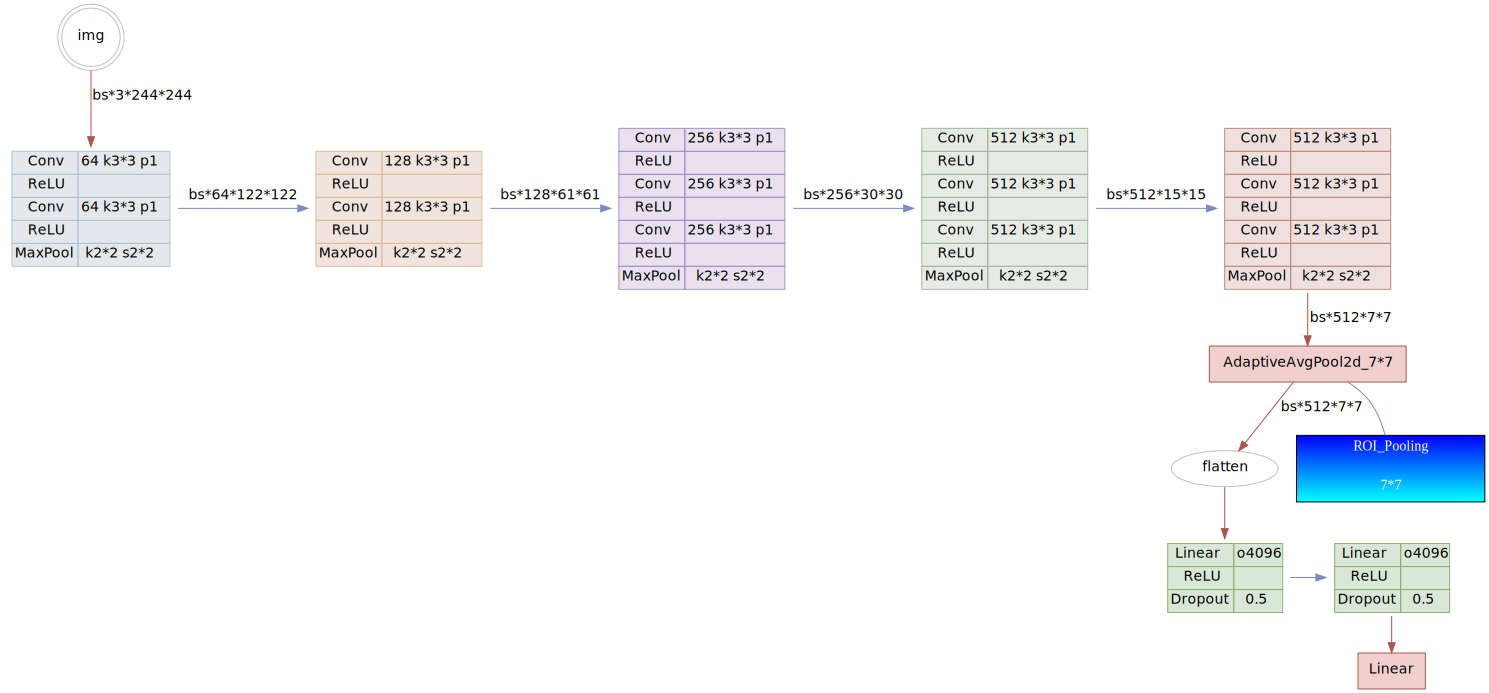

In [5]:
import graphviz

FONT_NAME = "Fira Code Retina"
graph = graphviz.Digraph(name="VGG16", format='png',node_attr={'shape': 'plaintext'})
graph.node('img', shape="doublecircle", color="grey", fontname=FONT_NAME)

with graph.subgraph() as s:
    s.attr(rank="same")
    s.node('block1', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>64 k3*3 p1</td></tr>
            <tr><td>ReLU</td><td></td></tr>
            <tr><td>Conv</td><td>64 k3*3 p1</td></tr>
            <tr><td>ReLU</td><td></td></tr>
            <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
            </table>
            >''', fontname=FONT_NAME)
    s.node('block2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>Conv</td><td>128 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>128 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block3', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block4', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block5', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.edge("block1", "block2", color="#7D88C7", label="bs*64*122*122", fontname=FONT_NAME)
    s.edge("block2", "block3", color="#7D88C7", label="bs*128*61*61", fontname=FONT_NAME)
    s.edge("block3", "block4", color="#7D88C7", label="bs*256*30*30", fontname=FONT_NAME)
    s.edge("block4", "block5", color="#7D88C7", label="bs*512*15*15", fontname=FONT_NAME)
graph.edge("img", "block1", label="bs*3*244*244", color="#AC5553", fontname=FONT_NAME)

graph.node("block6", shape="box", color = "#A25954", style = "filled", fillcolor = "#F1CFCD", label = "AdaptiveAvgPool2d_7*7", fontname = FONT_NAME)
graph.edge("block5", "block6", color="#AC5553",label="bs*512*7*7", fontname=FONT_NAME)
graph.node("block7", shape="ellipse",color="grey",label="flatten", fontname=FONT_NAME)
graph.edge("block6", "block7", color="#AC5553",label="bs*512*7*7", fontname=FONT_NAME)


with graph.subgraph() as s:
    s.attr(rank="same")
    s.node('block8', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#D9E7D6" color="#92AD73">
                    <tr><td>Linear</td><td>o4096</td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Dropout</td><td>0.5</td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
    s.node('block9', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#D9E7D6" color="#92AD73">
                        <tr><td>Linear</td><td>o4096</td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Dropout</td><td>0.5</td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
    s.edge("block8", "block9", color="#7D88C7")
graph.edge("block7", "block8", color="#AC5553")

graph.node("block10", shape="box", color = "#A25954", style = "filled", fillcolor = "#F1CFCD", label = "Linear", fontname = FONT_NAME)
graph.edge("block9", "block10", color="#AC5553")

graph.node("comment01", label="在这里做了一个ROI_Pooling\n无论输入什么尺寸\n输出尺寸都是7*7", shape="box", fillcolor='blue:cyan',fontcolor='white', style="filled", gradientangle='270')
graph.edge("block6", "comment01", color="#7D88C7", arrowhead="none")
graph


